In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

file_path = '/content/drive/My Drive/Colab Notebooks/CFBQBPassing.xlsx'
df = pd.read_excel(file_path, header=0)
df = df.loc[:, ~df.columns.str.contains('Unnamed')]
df.head()


Mounted at /content/drive


,PLAYER,TEAM,CFP RANK,SOS,CLASS,PASSING YARDS,PASSING TDS,RUSHING TDS,INTS,COMPLETION %,PASS ATT,Yards Per Catch,TEAMS RUN%
0,CJ Carr,Notre Dame,9,29,Freshman,2487,21,3,6,67.3,257,14.4,57.46
1,Julian Sayin,Ohio State,1,5 0,Freshman,2675,25,0,4,80.1,282,11.9,53.54
2,Fernando Mendoza,Indiana,2,38,Junior,2641,30,5,5,73.0,278,13.0,59.92
3,Marcel Reed,Texas A&M,3,18,Sophomore,2632,22,6,8,61.5,291,14.7,56.21
4,Gunner Stockton,Georgia,4,12,Junior,2269,19,8,3,70.7,287,11.2,57.66


Problem Statement:

To evaluate where CJ Carr ranks among the top quarterbacks in the league during his true freshman season by using statistical performance metrics.

We will first look at all the teams in the running for the College Football Playoffs and their respected strength of schedule (SOS).

In [ ]:
ranked = (
    df[["TEAM", "CFP RANK", "SOS"]]
        .drop_duplicates()
        .sort_values(["SOS", "CFP RANK"])
        .reset_index(drop=True)
)

for _, row in ranked.iterrows():
    print(f"{row['TEAM']} - SOS: {row['SOS']} - CFP Rank: {row['CFP RANK']}")


Alabama - SOS: 4 - CFP Rank: 10
Oklahoma - SOS: 10 - CFP Rank: 8
Georgia - SOS: 12 - CFP Rank: 4
Texas A&M - SOS: 18 - CFP Rank: 3
Vanderbilt - SOS: 21 - CFP Rank: 14
BYU - SOS: 27 - CFP Rank: 11
Notre Dame - SOS: 29 - CFP Rank: 9
Oregon - SOS: 31 - CFP Rank: 7
Ole Miss - SOS: 32 - CFP Rank: 6
USC - SOS: 36 - CFP Rank: 15
Indiana - SOS: 38 - CFP Rank: 2
Miami - SOS: 43 - CFP Rank: 13
Utah - SOS: 46 - CFP Rank: 12
Texas Tech - SOS: 52 - CFP Rank: 5
 Georgia Tech - SOS: 88 - CFP Rank: 16
Ohio State - SOS: 5 0 - CFP Rank: 1


Strength of schedule is a metric measuring how tough a team's opponents are, reflecting the difficulty of their overall schedule based on opponent quality (win percentages, ratings) and home/away games, crucial for comparing teams with different paths to the CFP.



We will now look at the first statistic, looking at the correlation between passing attempts and passing yards!

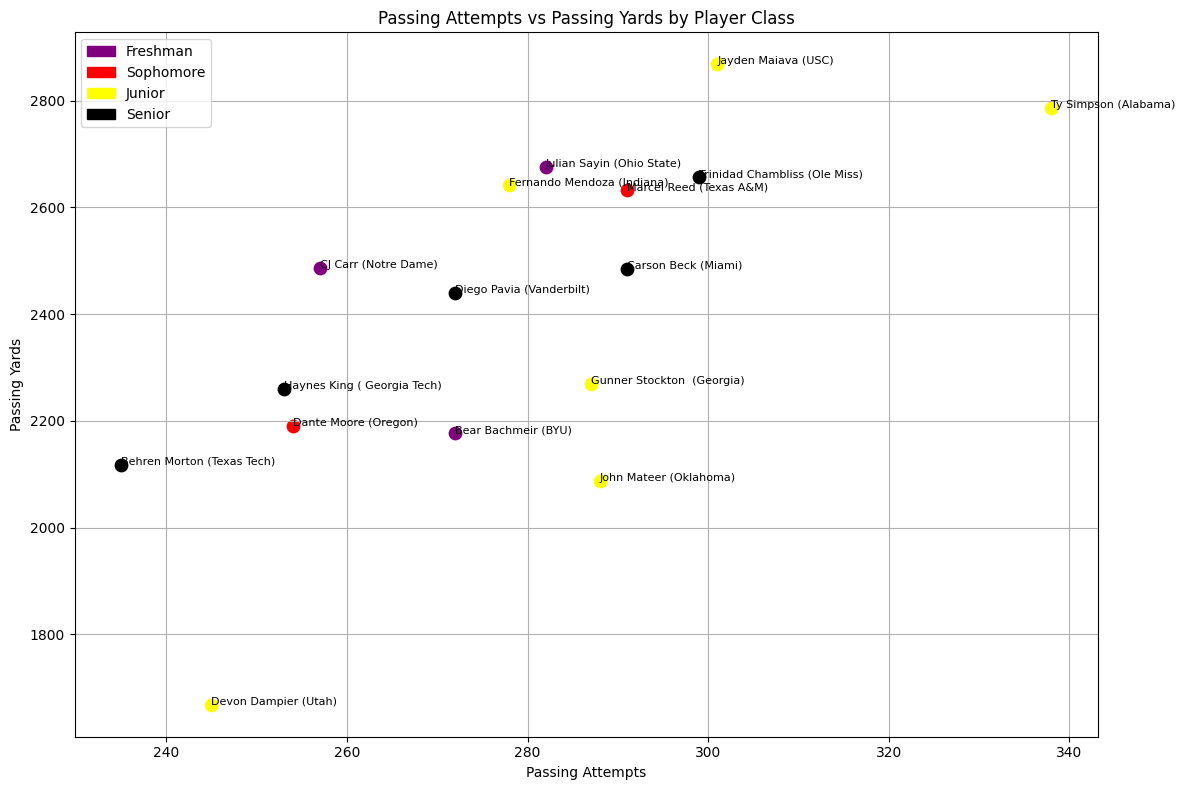

In [ ]:
import matplotlib.patches as mpatches
plt.figure(figsize=(12,8))
class_colors = {
    "Freshman": "purple",
    "Sophomore": "red",
    "Junior": "yellow",
    "Senior": "black"
}
for _, row in df.iterrows():
    name = row["PLAYER"]
    team = row["TEAM"]
    x = row["PASS ATT"]
    y = row["PASSING YARDS"]

    cls = row["CLASS"]
    color = class_colors.get(cls, "black")
    plt.scatter(x, y, color=color, s=80)
    plt.text(x, y, f"{name} ({team})", fontsize=8)

plt.xlabel("Passing Attempts")
plt.ylabel("Passing Yards")
plt.title("Passing Attempts vs Passing Yards by Player Class")

legend_handles = [
    mpatches.Patch(color="purple", label="Freshman"),
    mpatches.Patch(color="red", label="Sophomore"),
    mpatches.Patch(color="yellow", label="Junior"),
    mpatches.Patch(color="black", label="Senior")
]
plt.legend(handles=legend_handles)
plt.grid(True)
plt.tight_layout()
plt.show()



Passing attempts and passing yards are directly correlated together, the more you attempt the pass the more likely you are to have more passing yards. However, there are some outliers like CJ Carr who has just as many passing yards on less attempts.

We will now look at another statistic, looking at the correlation between yards per completion to passing yards.

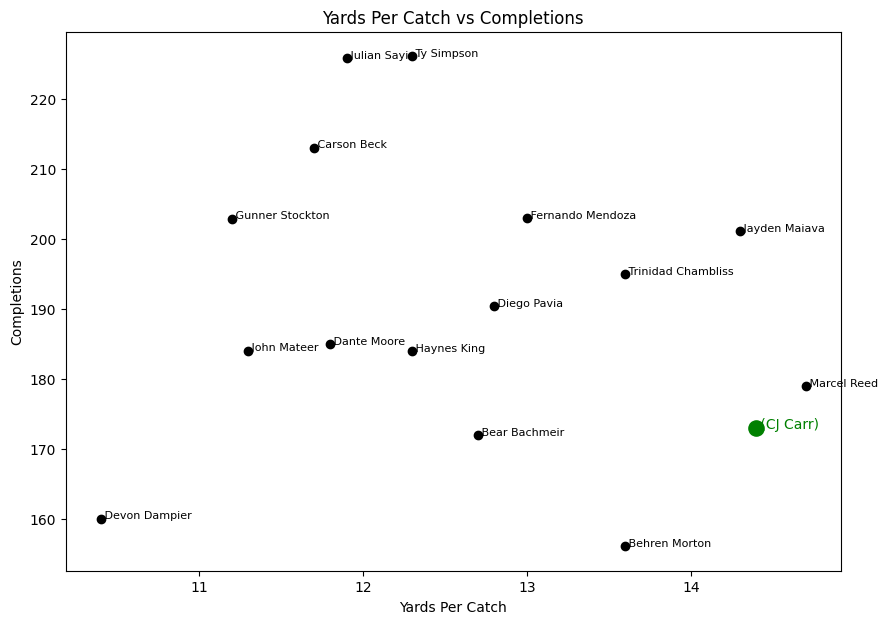

In [ ]:
df["COMPLETIONS"] = (df["COMPLETION %"] / 100) * df["PASS ATT"]

plt.figure(figsize=(10,7))
plt.scatter(df["Yards Per Catch"], df["COMPLETIONS"], color="black")

for _, row in df.iterrows():
    name = row["PLAYER"]
    x = row["Yards Per Catch"]
    y = row["COMPLETIONS"]

    if name == "CJ Carr":
        plt.scatter(x, y, color="green", s=120)
        plt.text(x, y, f" ({name})", fontsize=10, color="green")
    else:
        plt.text(x, y, f" {name}", fontsize=8)

plt.xlabel("Yards Per Catch")
plt.ylabel("Completions")
plt.title("Yards Per Catch vs Completions")

plt.show()


Yards Per Catch vs. Completions are directly correlated to each other as well as the previous graph. The more yards per catch per completion, the more passing yards a QB would have.

Finally, we will look at how often each team runs the football and the total amount of passing yards for each QB.

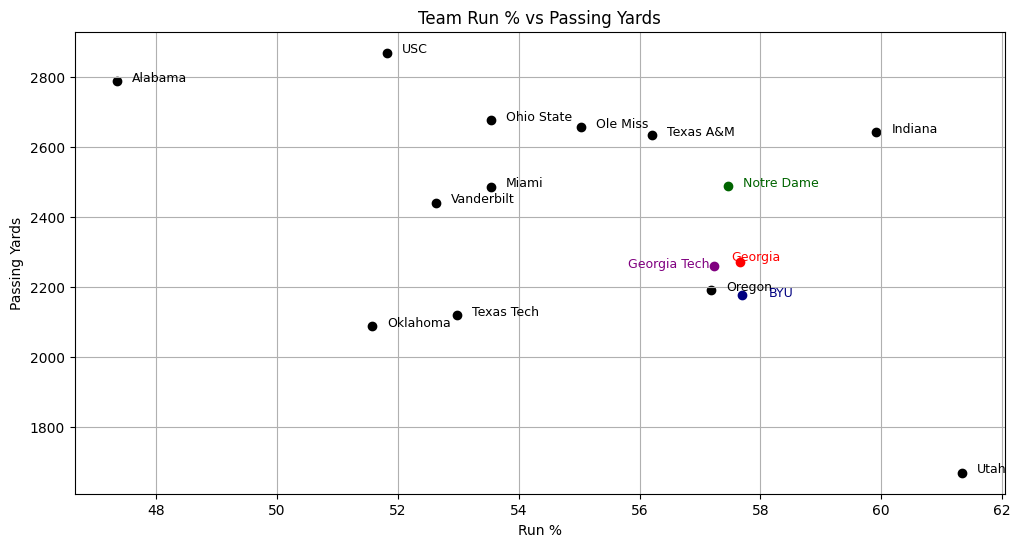

In [24]:
plt.figure(figsize=(12,6))

for i, row in df.iterrows():
    x = row["TEAMS RUN%"]
    y = row["PASSING YARDS"]
    team = row["TEAM"]
    color = "black"
    dx, dy = 0.25, 0

    if team == "Georgia":
        color = "red"
        dx, dy = -0.15, 6

    elif team == "Notre Dame":
        color = "darkgreen"

    elif team == "BYU":
        color = "navy"
        dx, dy = 0.45, -5

    elif team == " Georgia Tech":
        color = "purple"
        dx, dy = -1.49, -5

    plt.scatter(x, y, color=color)
    plt.text(x + dx, y + dy, team, fontsize=9, color=color)

plt.xlabel("Run %")
plt.ylabel("Passing Yards")
plt.title("Team Run % vs Passing Yards")
plt.grid(True)
plt.show()





How often a team runs the ball is direclty correlated to passing yards, if a team runs the ball more they are more likely to have less passing yards, and in turn, more rushing yards.


To find a more equal way to compare the stats, I decided to standardized to 300 passing attempts and look at passing yards.

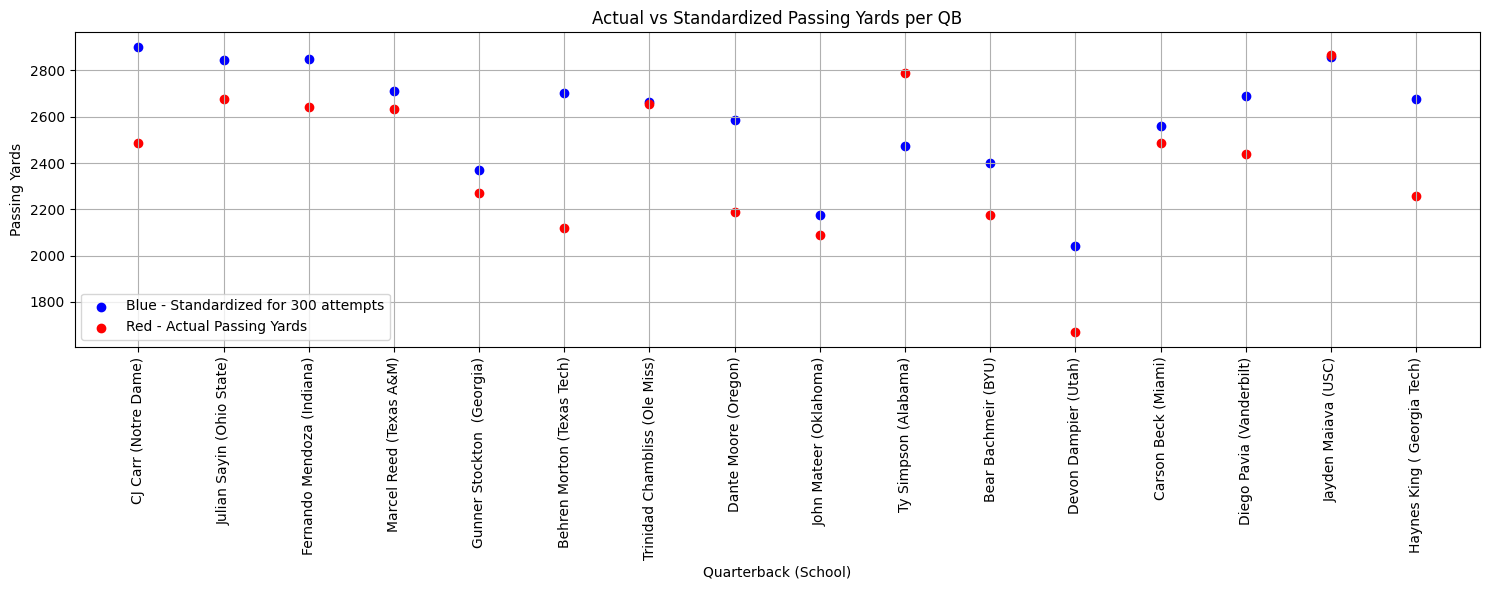

In [ ]:
STANDARD_ATT = 300
df["PASSING_YARDS_NORM"] = df["PASSING YARDS"] / df["PASS ATT"] * STANDARD_ATT
df["PLAYER_TEAM"] = df["PLAYER"] + " (" + df["TEAM"] + ")"

plt.figure(figsize=(15,6))
plt.scatter(df["PLAYER_TEAM"], df["PASSING_YARDS_NORM"], color="blue", label="Blue - Standardized for 300 attempts")
plt.scatter(df["PLAYER_TEAM"], df["PASSING YARDS"], color="red", label="Red - Actual Passing Yards")
plt.xlabel("Quarterback (School)")
plt.ylabel("Passing Yards")
plt.title("Actual vs Standardized Passing Yards per QB")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This was done by taking each QBs passing yards divided by passing attempts and multiplied by 300. A scatterplot was then made to compare the original and standarized stats.

I decided to do the same process, but instead of passing yards, I standarized passing touchdowns for each QB.

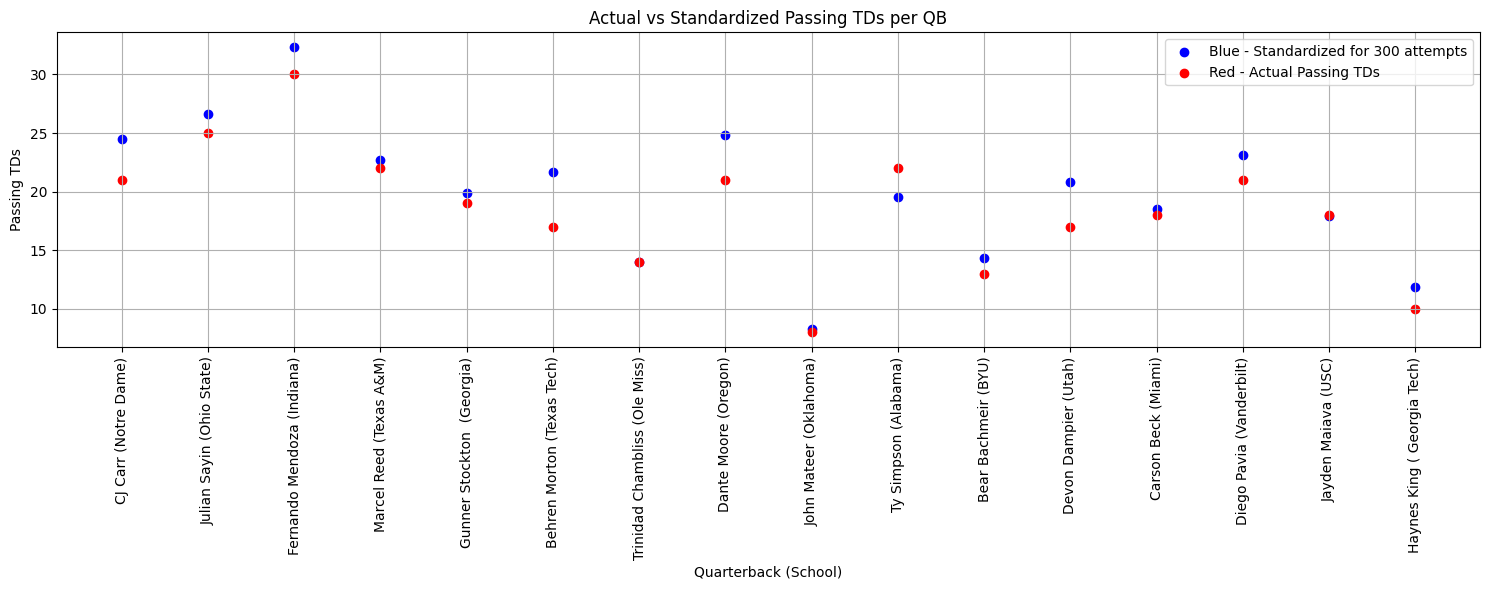

In [ ]:
STANDARD_ATT = 300
df["PASS_TDS_300_ATT"] = df["PASSING TDS"] / df["PASS ATT"] * STANDARD_ATT
df["PLAYER_TEAM"] = df["PLAYER"] + " (" + df["TEAM"] + ")"

plt.figure(figsize=(15,6))
plt.scatter(df["PLAYER_TEAM"], df["PASS_TDS_300_ATT"], color="blue", label="Blue - Standardized for 300 attempts")
plt.scatter(df["PLAYER_TEAM"], df["PASSING TDS"], color="red", label="Red - Actual Passing TDs")
plt.xlabel("Quarterback (School)")
plt.ylabel("Passing TDs")
plt.title("Actual vs Standardized Passing TDs per QB")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The code calculates a custom quarterback efficiency index (QBEI) for each player by combining per-attempt passing metrics, standardizes them using Z-scores, and then evaluates how CJ Carrs performance compares to other quarterbacks using a Z-score and one-tailed p-value to assess statistical significance. Essentially, it measures how exceptional CJ Carrs efficiency is relative to his peers

A QB Efficieny Index was created with these parameters weighted . Yards Per Attempt (50%), TD/INT Ratio (30%), Completions (20%). Each metric into a z-score.
YPA, TD/INT ratio, and completion % are on different scales so z-scores make them comparable.

In [ ]:
df["YPA"] = df["PASSING YARDS"] / df["PASS ATT"]
df["TD_MINUS_INT_PER_ATT"] = (df["PASSING TDS"] - df["INTS"]) / df["PASS ATT"]
df["COMP"] = df["COMPLETION %"]

metrics = ["YPA", "TD_MINUS_INT_PER_ATT", "COMP"]
for m in metrics:
    df[m + "_Z"] = (df[m] - df[m].mean()) / df[m].std(ddof=1)

# Weighted QBEI
df["QBEI"] = (
    0.50 * df["YPA_Z"] +
    0.30 * df["TD_MINUS_INT_PER_ATT_Z"] +
    0.20 * df["COMP_Z"]
)

cj = df[df["PLAYER"] == "CJ Carr"]["QBEI"].iloc[0]
others = df[df["PLAYER"] != "CJ Carr"]["QBEI"]
mean_o = others.mean()
std_o = others.std(ddof=1)

z = (cj - mean_o) / std_o
p = 1 - norm.cdf(z)

print("CJ Carr QBEI:", cj)
print("Z-score:", z)
print("One-tailed p-value:", p)

CJ Carr QBEI: 0.6989511565901857
Z-score: 0.9107864530861067
One-tailed p-value: 0.181203950828418


A 5 KFold Cross Validation Model was created and ran to compare CJ Carrs QBEI to other QBs

In [ ]:
from sklearn.model_selection import KFold
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

rows = []

for fold, (_, test_idx) in enumerate(kf.split(others), 1):
    sample = others.iloc[test_idx]
    m = sample.mean()
    s = sample.std(ddof=1)

    z_fold = (cj - m) / s
    p_fold = 1 - norm.cdf(z_fold)

    rows.append([fold, m, s, z_fold, p_fold])

cv_matrix = pd.DataFrame(rows, columns=["Fold", "Mean_QBEI", "Std_QBEI", "Z_Score", "P_Value"])

print("\nK-Fold Cross-Validation Matrix:\n")
print(cv_matrix)


K-Fold Cross-Validation Matrix:

   Fold  Mean_QBEI  Std_QBEI   Z_Score   P_Value
0     1   0.114102  1.129548  0.517772  0.302309
1     2  -0.015530  0.284435  2.511929  0.006004
2     3   0.431466  0.754300  0.354614  0.361439
3     4  -0.923055  1.013435  1.600504  0.054743
4     5   0.160033  0.371959  1.448865  0.073688


Fold 1: Carr is slightly above average vs this sample. Not significant.

Fold 2: Carr is MUCH better than this fold. Statistically significant.

Fold 3: Carr about average.

Fold 4: Car is borderline significant (just above 0.05).

Fold 5: Carr is slightly above average, not significant.

Null Hypothesis: CJ Carr QBEI is not better than the average QB in this study.

Alternate Hypothesis: CJ Carr QBEI is better than the average QB in this study.

Results: CJ Carrs QBEI is above average, however is not statistical significant.

A one feature logistic regression model was run using each teams passing yards to determine if the team was Pass-heavy or Run-heavy. This code labels each team as Run-Heavy or Pass-Heavy based on whether their run percentage exceeds 50%, then trains a logistic regression model using passing yards to predict that offensive style. It compares the models predictions to the actual labels, highlights correct vs. incorrect predictions in the final table, and prints the models overall accuracy.

In [ ]:
df['OFFENSE_TYPE'] = df['TEAMS RUN%'].apply(lambda x: 'Run-Heavy' if x > 50 else 'Pass-Heavy')
X = df[['PASSING YARDS']]
y = df['OFFENSE_TYPE']
model = LogisticRegression()
model.fit(X, y)
df['PREDICTED_OFFENSE'] = model.predict(X)
df_ranked = df.sort_values(by='TEAMS RUN%', ascending=False)
final_output = df_ranked[['TEAM', 'PASSING YARDS', 'TEAMS RUN%', 'OFFENSE_TYPE', 'PREDICTED_OFFENSE']]
def highlight_correct(row):
    color = 'background-color: '
    return [
        color + 'darkgreen' if row['OFFENSE_TYPE'] == row['PREDICTED_OFFENSE'] else color + 'red'
        for _ in row
    ]
styled_output = final_output.style.apply(highlight_correct, axis=1)
accuracy_full = (df['OFFENSE_TYPE'] == df['PREDICTED_OFFENSE']).mean()
print(f"Model Accuracy: {accuracy_full:.4f} ({accuracy_full*100:.2f}%)")
styled_output


Model Accuracy: 0.9375 (93.75%)


,TEAM,PASSING YARDS,TEAMS RUN%,OFFENSE_TYPE,PREDICTED_OFFENSE
11,Utah,1668,61.340000,Run-Heavy,Run-Heavy
2,Indiana,2641,59.920000,Run-Heavy,Run-Heavy
10,BYU,2177,57.690000,Run-Heavy,Run-Heavy
4,Georgia,2269,57.660000,Run-Heavy,Run-Heavy
0,Notre Dame,2487,57.460000,Run-Heavy,Run-Heavy
15,Georgia Tech,2259,57.240000,Run-Heavy,Run-Heavy
7,Oregon,2190,57.180000,Run-Heavy,Run-Heavy
3,Texas A&M,2632,56.210000,Run-Heavy,Run-Heavy
6,Ole Miss,2656,55.030000,Run-Heavy,Run-Heavy
1,Ohio State,2675,53.540000,Run-Heavy,Run-Heavy


The model accuracy was 93.75%. To improve on this model, a second feature was added.


Now, a two feature logistic regression model was run using BOTH a teams passing yards and passing attempts to determine if the team was a Pass-heavy or Run-heavy team. This correlates to the study as if a team was run heavy, then the QB would have less viable stats for comparision.

In [ ]:
df['OFFENSE_TYPE'] = df['TEAMS RUN%'].apply(lambda x: 'Run-Heavy' if x > 50 else 'Pass-Heavy')
X = df[['PASSING YARDS', 'PASS ATT']]
y = df['OFFENSE_TYPE']

model = LogisticRegression()
model.fit(X, y)

df['PREDICTED_OFFENSE'] = model.predict(X)
df_ranked = df.sort_values(by='TEAMS RUN%', ascending=False)
final_output = df_ranked[['TEAM', 'PASSING YARDS', 'PASS ATT', 'TEAMS RUN%', 'OFFENSE_TYPE', 'PREDICTED_OFFENSE']]

def highlight_correct(row):
    color = 'background-color: '
    return [
        color + 'darkgreen' if row['OFFENSE_TYPE'] == row['PREDICTED_OFFENSE'] else color + 'salmon'
        for _ in row
    ]
styled_output = final_output.style.apply(highlight_correct, axis=1)

accuracy_full = (df['OFFENSE_TYPE'] == df['PREDICTED_OFFENSE']).mean()
print(f"Model Accuracy (full dataset): {accuracy_full:.4f} ({accuracy_full*100:.2f}%)")

styled_output

Model Accuracy (full dataset): 1.0000 (100.00%)


,TEAM,PASSING YARDS,PASS ATT,TEAMS RUN%,OFFENSE_TYPE,PREDICTED_OFFENSE
11,Utah,1668,245,61.340000,Run-Heavy,Run-Heavy
2,Indiana,2641,278,59.920000,Run-Heavy,Run-Heavy
10,BYU,2177,272,57.690000,Run-Heavy,Run-Heavy
4,Georgia,2269,287,57.660000,Run-Heavy,Run-Heavy
0,Notre Dame,2487,257,57.460000,Run-Heavy,Run-Heavy
15,Georgia Tech,2259,253,57.240000,Run-Heavy,Run-Heavy
7,Oregon,2190,254,57.180000,Run-Heavy,Run-Heavy
3,Texas A&M,2632,291,56.210000,Run-Heavy,Run-Heavy
6,Ole Miss,2656,299,55.030000,Run-Heavy,Run-Heavy
1,Ohio State,2675,282,53.540000,Run-Heavy,Run-Heavy


 The model accuracy was now 100.0%. The addition of a second feature greatly improved the model

I would be comfortable with my project (slides & code) being shown to future students!

In [ ]:
#LINK TO GITHUB
## https://github.com/TylerEvangelista/CSC-FINAL-PROJECT-SUBMISSION